## College Football Data API Stuff

In [1]:
import bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from time import sleep
import cfbd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = 'cCUuy68SmBD3qQ/HK1HZ0cks/gHrSkPiSUdcom44hDyV49P3syOpoiFJnGq8MDDY'
configuration.api_key_prefix['Authorization'] = 'Bearer'

api_config = cfbd.ApiClient(configuration)

In [3]:
games_api = cfbd.GamesApi(api_config)
ratings_api = cfbd.RatingsApi(api_config)
elo_ratings = ratings_api.get_elo_ratings(year=2022)

In [4]:
games_2023 = games_api.get_games(year=2023)
print(type(games_2023))

games_2023[5]

<class 'list'>


{'attendance': 15356,
 'away_conference': 'FBS Independents',
 'away_division': 'fbs',
 'away_id': 113,
 'away_line_scores': [7, 3, 3, 28],
 'away_points': 41,
 'away_post_win_prob': 0.760751136602543,
 'away_postgame_elo': 1122,
 'away_pregame_elo': 1074,
 'away_team': 'UMass',
 'completed': True,
 'conference_game': False,
 'excitement_index': 5.311493375,
 'highlights': None,
 'home_conference': 'Conference USA',
 'home_division': 'fbs',
 'home_id': 166,
 'home_line_scores': [0, 10, 0, 20],
 'home_points': 30,
 'home_post_win_prob': 0.23924886339745693,
 'home_postgame_elo': 1274,
 'home_pregame_elo': 1322,
 'home_team': 'New Mexico State',
 'id': 401525450,
 'neutral_site': False,
 'notes': None,
 'season': 2023,
 'season_type': 'regular',
 'start_date': '2023-08-26T23:00:00.000Z',
 'start_time_tbd': False,
 'venue': 'Aggie Memorial Stadium',
 'venue_id': 3601,
 'week': 1}

In [5]:
# using the from records thing to 
games_df_2023 = (pd.DataFrame.from_records([dict(home_team=g.home_team, away_team = g.away_team, venue = g.venue
                                            ,home_score = g.home_points, away_score = g.away_points) for g in games_2023]))
games_df_2023.head()

print('games_2023 is a ' + str(type(games_2023)))
print('games_df_2023 is a ' + str(type(games_df_2023)))
# print()
# print('Ohio State Home Games 2023')
# print()
# print(games_df_2023.loc[games_df_2023.home_team == 'Ohio State'])

games_2023 is a <class 'list'>
games_df_2023 is a <class 'pandas.core.frame.DataFrame'>


In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [7]:
# Data Frame for just Ohio State Games
OSU_home_games = pd.DataFrame(games_df_2023.loc[games_df_2023.home_team == 'Ohio State'])
OSU_home_games

,home_team,away_team,venue,home_score,away_score
381,Ohio State,Youngstown State,Ohio Stadium,35.0,7.0
852,Ohio State,Western Kentucky,Ohio Stadium,63.0,10.0
1595,Ohio State,Maryland,Ohio Stadium,37.0,17.0
2187,Ohio State,Penn State,Ohio Stadium,20.0,12.0
3377,Ohio State,Michigan State,Ohio Stadium,38.0,3.0
3493,Ohio State,Minnesota,Ohio Stadium,37.0,3.0


In [ ]:
with plt.style.context('fivethirtyeight'):
    # Graph Inputs 
    plt.figure(figsize=(10,3))
    plt.scatter(OSU_home_games['away_team'], OSU_home_games['home_score'])
    plt.xlabel('Opponent')
    plt.ylabel('Score')
    plt.title('OSU Home Game Scores')
    plt.xticks(rotation=60)
    plt.ylim(bottom=0, top=70)
plt.show()

### Getting Team Logos with Matplotlib and then using them

In [8]:
#  import module
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


# function for getting team logo and creating an image object based off of it
def getImage(team):
    return OffsetImage(plt.imread(f'./logos/{team}.png'))

(0.0, 70.0)

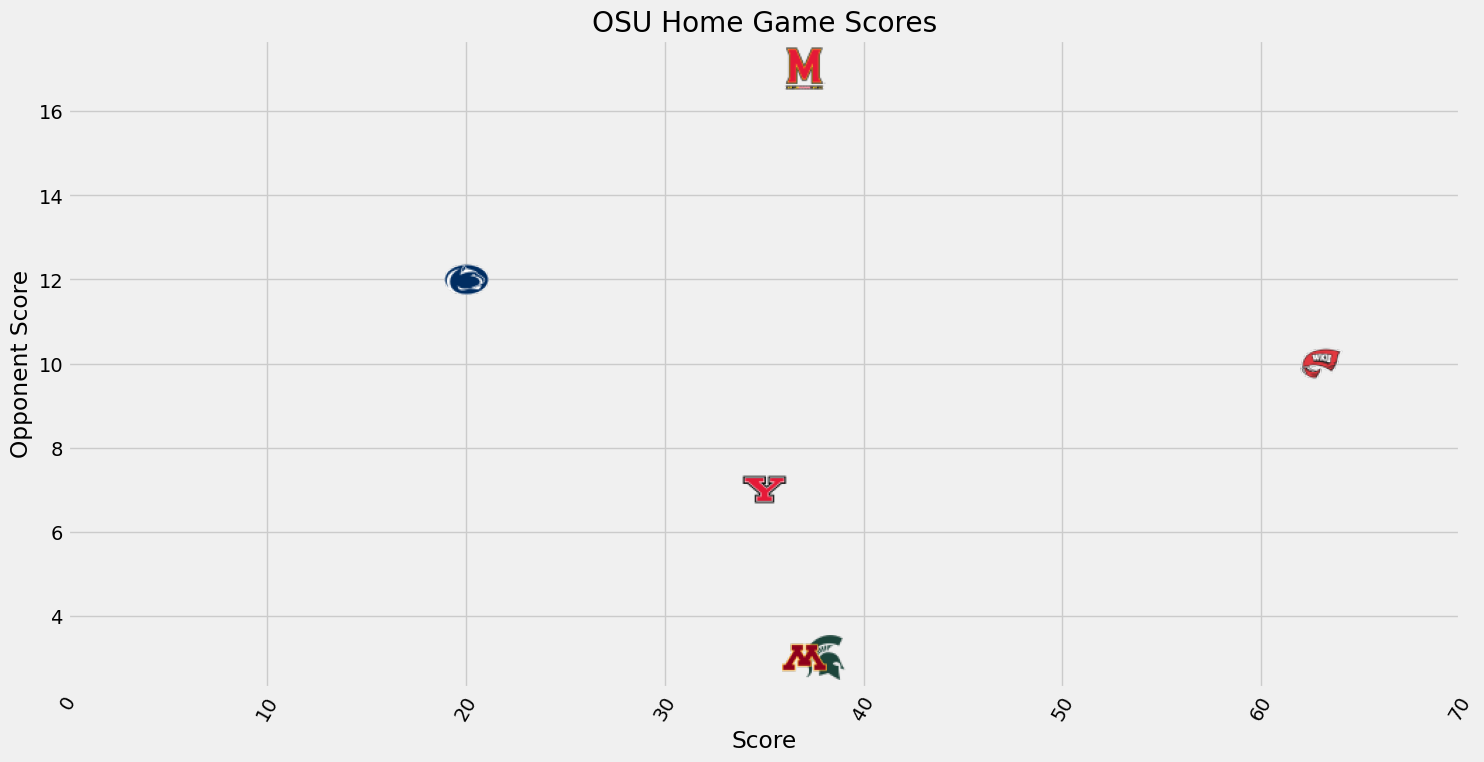

In [29]:
# Setting figure parameters for the rest of this worksheet
plt.rcParams["figure.figsize"] = [20,10]
plt.style.use('fivethirtyeight')

# Setting up a subplot
fig, ax = plt.subplots()

# alpha set to 0 so that the original dots don't show up
ax.scatter(OSU_home_games['home_score'], OSU_home_games['away_score'],  alpha = 0)


# replacing the blank dot with a team logo using the getImage function and AnnotationBbox function)
for index, r in OSU_home_games.iterrows():
    ab = AnnotationBbox(getImage(r.away_team), (r.home_score, r.away_score), frameon=False)
    ax.add_artist(ab)

plt.ylabel('Opponent Score')
plt.xlabel('Score')
plt.title('OSU Home Game Scores')
plt.xticks(rotation=60)
plt.xlim(left=0, right=70)

In [88]:
elos = ratings_api.get_elo_ratings(team='Ohio State')
df = pd.DataFrame.from_records([e.to_dict() for e in elos])

In [ ]:
#The team's lowest elo years
#df=df.sort_values('Value')
# nlargest = df.groupby('team')['elo'].nlargest(4).reset_index()['level_1'].values

#investigating some down years so I can comment on them
df.loc[(df.year > 1980) & (df.year < 2003)]

Text(0.5, 1.0, 'Historical Elo Rating (Ohio State)')

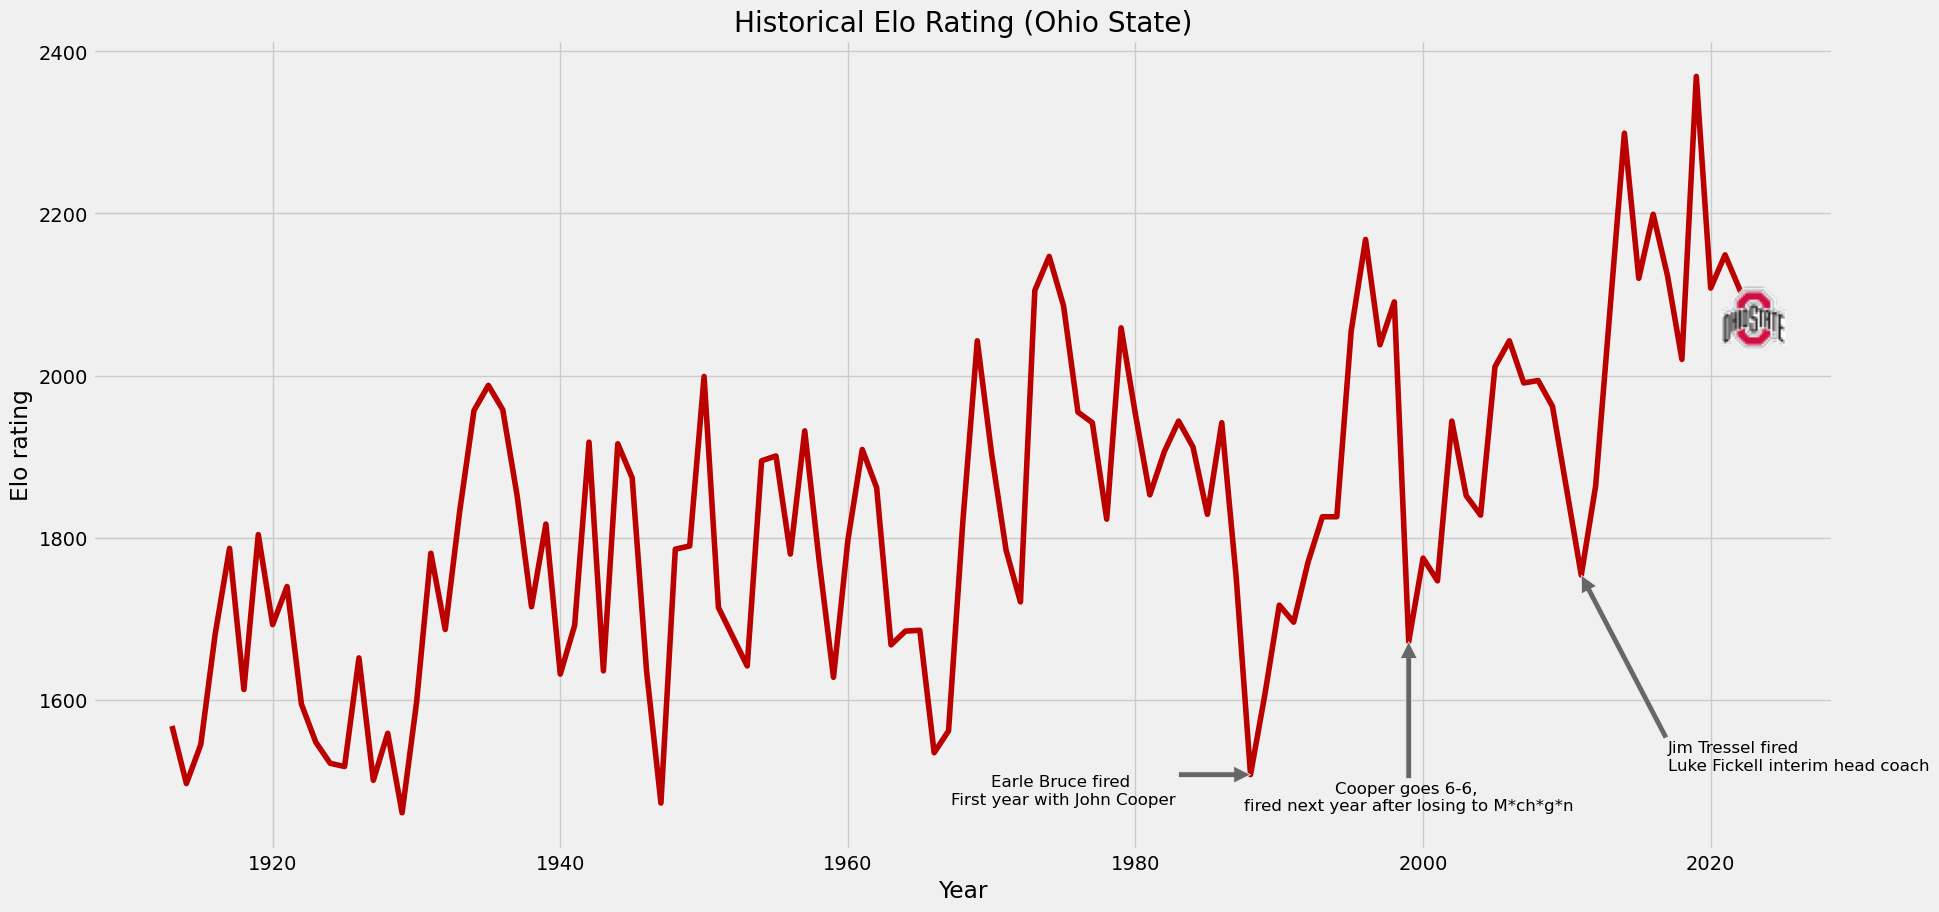

In [89]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

#Actually plotting the thing
ax.plot(df['year'], df['elo'], color='#BB0000')

# Adding OSU logo to end point of line
logo = OffsetImage(plt.imread('./logos/Ohio State.png'), zoom=1.5)
ab = AnnotationBbox(logo, (2023, 2070), frameon=False)
ax.add_artist(ab)

#Calling out specific points with a line and text
ax.annotate('Jim Tressel fired \nLuke Fickell interim head coach',
            xy=(2011, 1754), xycoords='data',
            xytext=(2017, 1550), textcoords='data',
            arrowprops=dict(facecolor='#666666'),
            horizontalalignment='left', 
            verticalalignment='top',
            fontsize=12)

ax.annotate('Earle Bruce fired \nFirst year with John Cooper',
            xy=(1988, 1508), xycoords='data',
            xytext=(1975, 1508), textcoords='data',
            arrowprops=dict(facecolor='#666666'),
            horizontalalignment='center', verticalalignment='top',
            fontsize=12, wrap=True)

ax.annotate('Cooper goes 6-6, \nfired next year after losing to M*ch*g*n',
            xy=(1999, 1672), xycoords='data',
            xytext=(1999, 1500), textcoords='data',
            arrowprops=dict(facecolor='#666666'),
            horizontalalignment='center', verticalalignment='top',
            fontsize=12, wrap=True)


#Settings
plt.xlabel('Year')
plt.ylabel('Elo rating')
plt.title('Historical Elo Rating (Ohio State)')